In [1]:
import requests
import zipfile
import os

# URL of the dataset
url = 'https://www.dropbox.com/scl/fi/u2w4eoeiksyae1pn0di6d/IndianSignLanguage.zip?rlkey=38ztp9zkqvhdvusoeet3a9qex&dl=1'  # Set dl=1 to download directly

# Download the file
response = requests.get(url)
zip_path = 'IndianSignLanguage.zip'

# Save the ZIP file
with open(zip_path, 'wb') as f:
    f.write(response.content)

print("Dataset downloaded successfully.")

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('IndianSignLanguage')

print("Dataset extracted successfully.")

Dataset downloaded successfully.
Dataset extracted successfully.


Metadata Summary:
Total number of images: 42000
Number of classes: 35
Class distribution:
   ClassID  NumImages
0        1       1200
1        2       1200
2        3       1200
3        4       1200
4        5       1200
5        6       1200
6        7       1200
7        8       1200
8        9       1200
9        A       1200
10       B       1200
11       C       1200
12       D       1200
13       E       1200
14       F       1200
15       G       1200
16       H       1200
17       I       1200
18       J       1200
19       K       1200
20       L       1200
21       M       1200
22       N       1200
23       O       1200
24       P       1200
25       Q       1200
26       R       1200
27       S       1200
28       T       1200
29       U       1200
30       V       1200
31       W       1200
32       X       1200
33       Y       1200
34       Z       1200



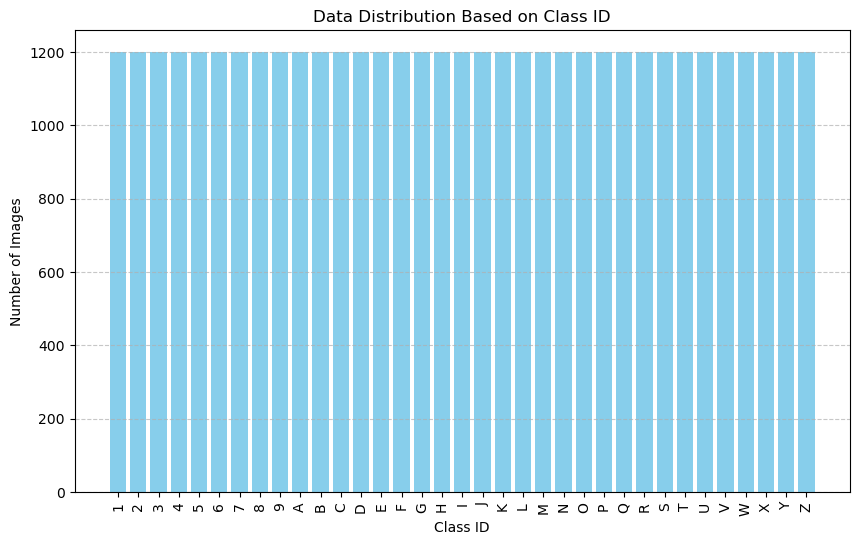

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Function to load the dataset and extract metadata
def extract_metadata(dataset_path):
    data = []
    class_distribution = {}

    # Loop through each class directory
    for class_dir in os.listdir(dataset_path):
        # Skip hidden files or directories (e.g., .DS_Store on macOS)
        if class_dir.startswith('.'):
            continue

        # Use the directory name as the class label (no conversion to int)
        class_id = class_dir
        class_images = os.listdir(os.path.join(dataset_path, class_dir))

        # Count the number of images in the class directory
        class_distribution[class_id] = len(class_images)
        data.append((class_id, len(class_images)))

    # Convert data to DataFrame for easier manipulation and visualization
    df = pd.DataFrame(data, columns=['ClassID', 'NumImages'])

    # Calculate total number of images
    total_images = df['NumImages'].sum()

    # Display metadata
    print("Metadata Summary:")
    print("=================")
    print("Total number of images:", total_images)
    print("Number of classes:", len(df))
    print("Class distribution:")
    print(df)
    print("")

    return df, class_distribution

# Path to the dataset
dataset_path = "IndianSignLanguage/data"

# Extract metadata
metadata_df, class_distribution = extract_metadata(dataset_path)

# Plot the data distribution based on class ID
plt.figure(figsize=(10, 6))
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.xlabel('Class ID')
plt.ylabel('Number of Images')
plt.title('Data Distribution Based on Class ID')
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many classes
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Directory 'IndianSignLanguage_processed\1' already exists. Skipping copying.
Directory 'IndianSignLanguage_processed\2' already exists. Skipping copying.
Directory 'IndianSignLanguage_processed\3' already exists. Skipping copying.
Directory 'IndianSignLanguage_processed\4' already exists. Skipping copying.
Directory 'IndianSignLanguage_processed\5' already exists. Skipping copying.
Directory 'IndianSignLanguage_processed\6' already exists. Skipping copying.
Directory 'IndianSignLanguage_processed\7' already exists. Skipping copying.
Directory 'IndianSignLanguage_processed\8' already exists. Skipping copying.
Directory 'IndianSignLanguage_processed\9' already exists. Skipping copying.
Directory 'IndianSignLanguage_processed\A' already exists. Skipping copying.
Directory 'IndianSignLanguage_processed\B' already exists. Skipping copying.
Directory 'IndianSignLanguage_processed\C' already exists. Skipping copying.
Directory 'IndianSignLanguage_processed\D' already exists. Skipping copying.

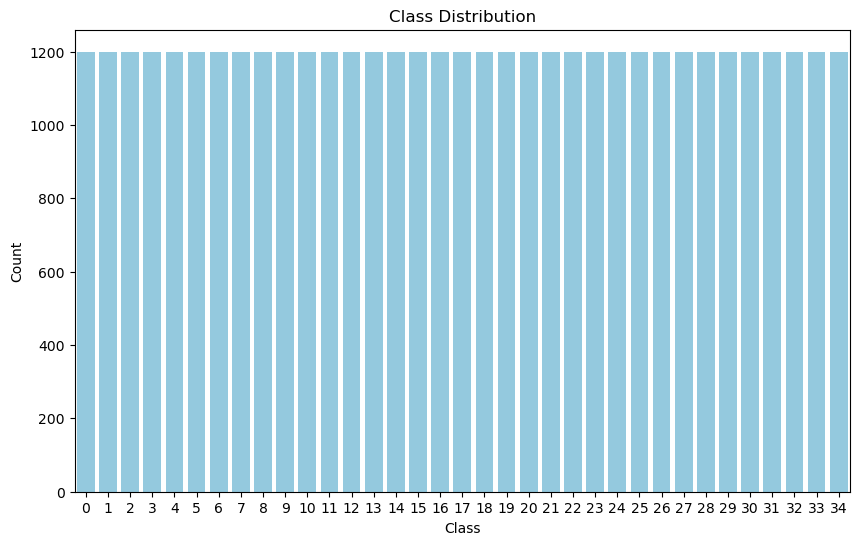

In [5]:
import os
import shutil
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms

# Define paths
source_dir = "IndianSignLanguage/data"
target_dir = "IndianSignLanguage_processed"

# Create target directory if it doesn't exist
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Define classes to keep (adjust as needed for your dataset)
# Here, classes can be set as specific folder names you want to keep.
classes_to_keep = os.listdir(source_dir)  # Keeps all classes in the dataset

# Copy images of selected classes to the target directory
for class_name in classes_to_keep:
    src_path = os.path.join(source_dir, class_name)
    dst_path = os.path.join(target_dir, class_name)
    try:
        shutil.copytree(src_path, dst_path)
    except FileExistsError:
        print(f"Directory '{dst_path}' already exists. Skipping copying.")

# Dataset Paths
data_dir = target_dir

# Extract metadata
# Exploratory Analysis
print("Exploratory Analysis:")
metadata_df, class_distribution = extract_metadata(data_dir)

# Image transformations with data augmentation
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(10),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load dataset with augmented transform
dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)

# Convert to DataFrame
df = pd.DataFrame(dataset.imgs, columns=['image_path', 'label'])

# Distribution Graphs
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


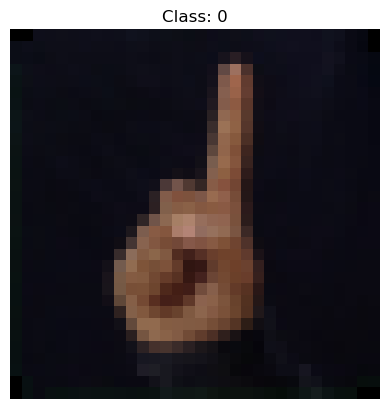

In [7]:
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Define the transformations
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomVerticalFlip(),  # Random vertical flip
    transforms.RandomRotation(10),  # Random rotation within ±10 degrees
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load dataset (make sure to replace 'data_dir' with your actual dataset path)
data_dir = 'IndianSignLanguage_processed'  # Replace with your dataset path
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Select a random image from the dataset
img, label = dataset[2]  # Get the first image and its label

# Convert tensor to numpy for visualization
img = img.numpy().transpose((1, 2, 0))  # Convert to HWC format
img = img * 0.5 + 0.5  # Undo the normalization (mean=0.5, std=0.5)

# Plot the image
plt.imshow(img)
plt.title(f'Class: {label}')
plt.axis('off')  # Hide axis
plt.show()


In [9]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import os
import pandas as pd
# import cv2
from mpl_toolkits.mplot3d import Axes3D

In [10]:
# Set the random seed
# torch.manual_seed(42)
# Split dataset into train and test
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [13]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Suppress the warning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Function to evaluate the model
def evaluate_model(model, test_loader, device):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            # Move images and labels to the GPU
            images, labels = images.to(device), labels.to(device)

            # Get model outputs and predictions
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            # Store predictions and labels
            all_preds.extend(predicted.cpu().numpy())  # Move predictions to CPU
            all_labels.extend(labels.cpu().numpy())  # Move labels to CPU

    # Calculate evaluation metrics
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division='warn')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    accuracy = accuracy_score(all_labels, all_preds)

    return accuracy, f1, recall, precision


In [15]:
# Lists to store training loss and metrics
training_loss_arr = [[] for _ in range(3)]  # Store loss for each dataset
accuracy_arr = [[] for _ in range(3)]  # Store accuracy for each dataset
f1_arr = [[] for _ in range(3)]  # Store F1 score for each dataset
recall_arr = [[] for _ in range(3)]  # Store recall for each dataset
precision_arr = [[] for _ in range(3)]  # Store precision for each dataset
# roc = [[] for _ in range(3)]  # Store roc for each dataset
epocs =10
train_loaders_arr = [0, 1, 2]

In [17]:
import torch.nn as nn
import torch.nn.functional as F

class VGG11(nn.Module):
    def __init__(self,num_classes):
        super(VGG11, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(512, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),

            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),

            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [19]:
import torch
import torch.nn as nn

# Check if CUDA is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the model
net = VGG11(num_classes=35).to(device)  # Move the model to the GPU

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # Get the inputs and labels and move them to the GPU
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 100 == 99:
            # print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0

    # Print loss for the epoch
    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader):.3f}")

    # Evaluate the model
    acc, f1_val, recall_val, precision_val = evaluate_model(net, test_loader,device)  # Assuming test_loader is defined

    # Save metrics
    accuracy_arr[0].append(acc)
    f1_arr[0].append(f1_val)
    recall_arr[0].append(recall_val)
    precision_arr[0].append(precision_val)

# Print the metrics
print("Accuracy:", accuracy_arr)
print("F1 Score:", f1_arr)
print("Recall:", recall_arr)
print("Precision:", precision_arr)

print("Finished Training")


Epoch 1, Loss: 0.253
Epoch 2, Loss: 0.133
Epoch 3, Loss: 0.045
Epoch 4, Loss: 0.033
Epoch 5, Loss: 0.013
Epoch 6, Loss: 0.046
Epoch 7, Loss: 0.005
Epoch 8, Loss: 0.005
Epoch 9, Loss: 0.005
Epoch 10, Loss: 0.002
Accuracy: [[0.2149035790810253, 0.5698754067137529, 0.8779461947464487, 0.950321403063249, 0.9292913260852314, 0.959368304102849, 0.989683358463614, 0.9269105626537576, 0.9917466867708912, 0.9952384731370526], [], []]
F1 Score: [[0.17928212770342494, 0.5232567552498828, 0.8701860021091185, 0.9484691545885786, 0.9270342833470889, 0.9588186734434561, 0.9896919741664159, 0.9262038058298047, 0.9917448961497187, 0.9952352436713324], [], []]
Recall: [[0.2149035790810253, 0.5698754067137529, 0.8779461947464487, 0.950321403063249, 0.9292913260852314, 0.959368304102849, 0.989683358463614, 0.9269105626537576, 0.9917466867708912, 0.9952384731370526], [], []]
Precision: [[0.20106429508520024, 0.5670753672441605, 0.8886286016715441, 0.9533798860672702, 0.9374209221555829, 0.9615000634686132,

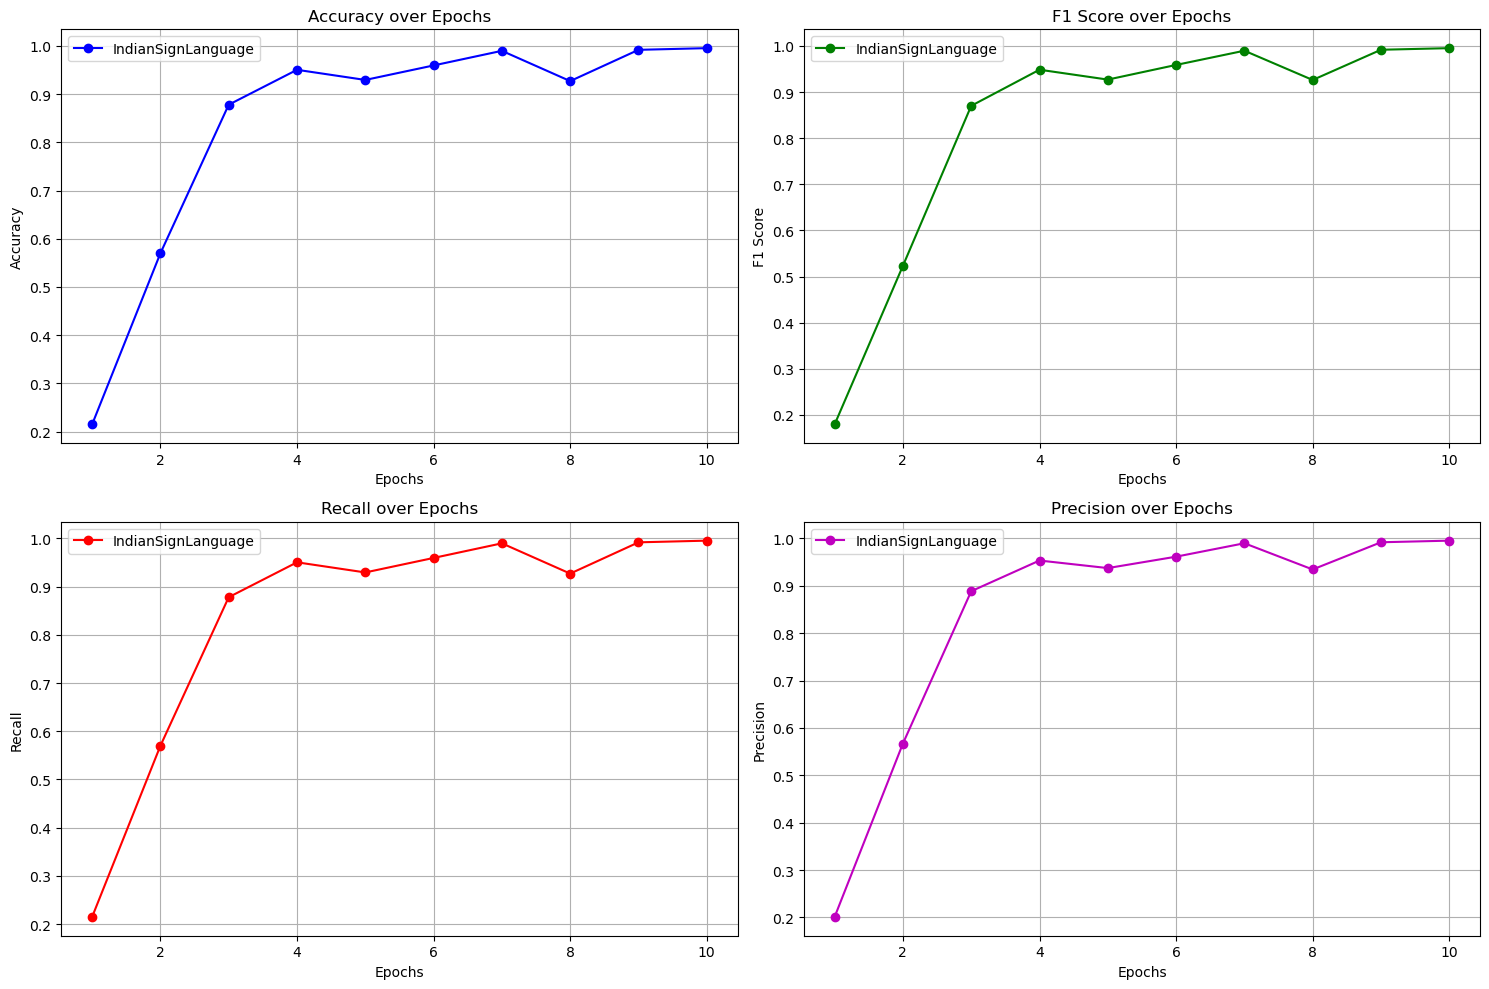

In [21]:
import matplotlib.pyplot as plt

# Define the number of epochs
epochs = range(1, 11)  # Assuming you have 10 epochs

# Plotting function for a single dataset
def my_plot(epochs, accuracy_arr, f1_arr, recall_arr, precision_arr, label):
    plt.figure(figsize=(15, 10))

    # Plot Accuracy
    plt.subplot(2, 2, 1)
    plt.plot(epochs, accuracy_arr, label='IndianSignLanguage', marker='o', color='b')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot F1 Score
    plt.subplot(2, 2, 2)
    plt.plot(epochs, f1_arr, label='IndianSignLanguage', marker='o', color='g')
    plt.title('F1 Score over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.grid(True)

    # Plot Recall
    plt.subplot(2, 2, 3)
    plt.plot(epochs, recall_arr, label='IndianSignLanguage', marker='o', color='r')
    plt.title('Recall over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()
    plt.grid(True)

    # Plot Precision
    plt.subplot(2, 2, 4)
    plt.plot(epochs, precision_arr, label='IndianSignLanguage', marker='o', color='m')
    plt.title('Precision over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid(True)

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

# Call the function to plot
my_plot(epochs, accuracy_arr[0], f1_arr[0], recall_arr[0], precision_arr[0], 'IndianSignLanguage')
